<a href="https://colab.research.google.com/github/Yonch1/Machine_learning/blob/main/Yonatan_Shirman_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [15]:

from sklearn.datasets import load_breast_cancer

my_data = load_breast_cancer()


2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

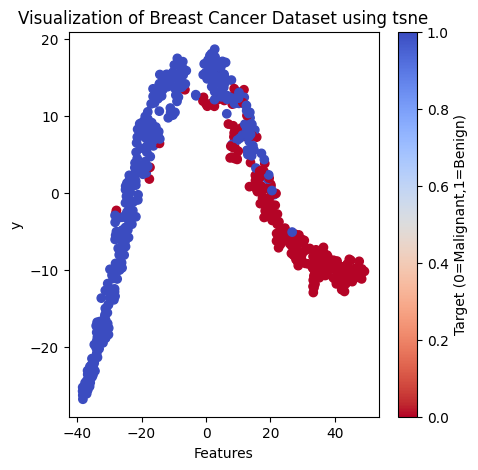


 3d interactive plot 



In [16]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


#print(my_data) printed to see how the data looks like.

#arraning data to axis
x = my_data.data #contains the features
y = my_data.target #contains if the cancer is Maligant or Benign (Binary)

#Data reduction to 2 dimensions
tsne_2d= TSNE(n_components=2, random_state=0)
X_tsne= tsne_2d.fit_transform(x)

#creating the graph
plt.figure(figsize=(5,5)) #grpah size
scatter= plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='coolwarm_r') #type of grph-scatter
plt.colorbar(scatter, label='Target (0=Malignant,1=Benign)') #explanation for the colors shown in the graph
plt.title("Visualization of Breast Cancer Dataset using tsne") #title
plt.xlabel('Features')
plt.ylabel('y')
plt.show()

#Ive found and interesting way to visualize the data in 3D rather than 2D.
#plotly.express is similar to matplotlib for visualizing data but plotly makes interactive visualizations as can be seen in an exmaple below.
print('\n 3d interactive plot \n')

#Data reduction to 3 dimensions
tsne_3d = TSNE(n_components=3, random_state=0)
X_tsne_3d = tsne_3d.fit_transform(x)

#fitting the data into columns using panda library
dataframe = pd.DataFrame(X_tsne_3d, columns=["features1", "features2", "features3"]) #fitting the 3d normalized data
dataframe['Target'] = y

#Create interactive Plotly scatter plot
fig_3d = px.scatter_3d(dataframe,x="features1", y="features2", z="features3",color='Target',title="3D Visualization using tsne",labels={'color': 'Target (0=Malignant, 1=Benign)'},color_continuous_scale='RdBu')

fig_3d.show()




3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [17]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0) #x is already a 2d array, y is 1d array, 80% of the data for training and 20% for testing
#checking if the data sizes are compatible for the classifier
X_train.shape
Y_test.shape

(114,)

4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

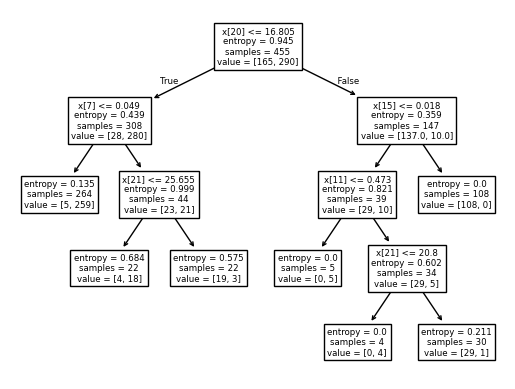

In [18]:
from math import sqrt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV

#The parametrs which gave the best accuracy
model_decision_tree = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.02, max_features=3 ,max_depth=6, random_state=42)
model_decision_tree = model_decision_tree.fit(X_train, Y_train)

#predict y using the test data as defined in data split section.
y_pred_decision_tree = model_decision_tree.predict(X_test)


#drawing the tree to visualize how it looks, for personal use
tree=tree.plot_tree(model_decision_tree)




5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [19]:
from sklearn.ensemble import RandomForestClassifier

#The parametrs which gave the best accuracy
model_random_forest = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=8, min_impurity_decrease=0.027, max_features=8, random_state=0, ccp_alpha=0.027)
model_random_forest.fit(X_train, Y_train)

y_pred_forest = model_random_forest.predict(X_test)



6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [20]:
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(n_estimators=200, learning_rate=0.905, random_state=0, algorithm='SAMME.R')
model_adaboost.fit(X_train, Y_train)

y_pred_adaboost = model_adaboost.predict(X_test)




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#function for evaluating each model. each evaluation for each model is stored as dictionary database
def evaluate_model(Y_real, Y_prediction):
    metrics ={'accuracy': accuracy_score(Y_real, Y_prediction)
              ,'confusion_matrix': confusion_matrix(Y_real, Y_prediction)
              ,'precision': precision_score(Y_real, Y_prediction)
              ,'recall': recall_score(Y_real, Y_prediction)
              ,'f1_score': f1_score(Y_real, Y_prediction)
              }
    return metrics

#print the metrics results for each model
def print_metrics(model_name, metrics):
    print(f"{model_name} Results:\n")
    for metric, value in metrics.items():
        print(f" {metric}:\n {value}\n")
    print("----------------------------\n" )

#announces the most accurate model based on f1_score metric
def best_classifier(decision_tree,random_forest,adaboost):
  best_class = decision_tree['f1_score']  #chose randomly the decision tree model to initialize the best class decision
  name_class = "Decision Tree" #chose randomly the decision tree model to initialize the best class decision
  if random_forest['f1_score'] > best_class:
      best_class = random_forest['f1_score']
      name_class = "Random Forest"
  if adaboost['f1_score'] > best_class:
      best_class = adaboost['f1_score']
      name_class = "AdaBoost"

  return name_class

#evaluate each model
decision_tree=evaluate_model(Y_test,y_pred_decision_tree)
random_forest=evaluate_model(Y_test,y_pred_forest)
adaboost=evaluate_model(Y_test,y_pred_adaboost)

#print the metrics for each model
print_metrics("Decision Tree", decision_tree)
print_metrics("Random Forest", random_forest)
print_metrics("AdaBoost", adaboost)

#print the most accurate model based on f1_score metric
print(f"the best classifier based on f1_score metric is:{best_classifier(decision_tree,random_forest,adaboost)}")


Decision Tree Results:

 accuracy:
 0.9912280701754386

 confusion_matrix:
 [[47  0]
 [ 1 66]]

 precision:
 1.0

 recall:
 0.9850746268656716

 f1_score:
 0.9924812030075187

----------------------------

Random Forest Results:

 accuracy:
 0.9824561403508771

 confusion_matrix:
 [[46  1]
 [ 1 66]]

 precision:
 0.9850746268656716

 recall:
 0.9850746268656716

 f1_score:
 0.9850746268656716

----------------------------

AdaBoost Results:

 accuracy:
 0.9912280701754386

 confusion_matrix:
 [[46  1]
 [ 0 67]]

 precision:
 0.9852941176470589

 recall:
 1.0

 f1_score:
 0.9925925925925926

----------------------------

the best classifier based on f1_score metric is:AdaBoost
